In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report, roc_curve, RocCurveDisplay

**Logistic Regression:**  
Classifiers are a core component of machine learning models and can be applied across a variety of disciplines and problem statements.  
- supervised  
- for binary classification (although it can be extended to more than 2 categories, it predicts the probability of an outcome belonging to a 0/1).

It uses the logistic function (the sigmoid function) to map the input features to a probability outcome score ranging from 0 to 1.  We set the threshold, typically .5. For example, if a datapoint probablity is .72, the model assigns it to class 1 as it is > .5. We can choose any threshold, for example, to be more stringent. For this medical dataset, negative outcomes (Benign) and positive outcomes (Malignant).

**Cost Function** quantifies the error between predicted values and expected values.  
The loss function for linear regression is squared loss.  
The loss function for logistic regression is Log Loss.
.

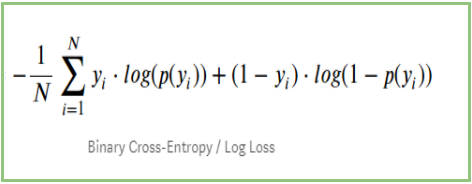

- Find corrected probabilities.  
- Take a log of corrected probabilities.  
- Take the negative average of the values we get in the 2nd step.
  
Notice that, like any loss function should, this function is 0 when the predicted class of every point xi is equal to the true labels for each point yi. Training our classifier means finding the weights that minimize this function.  

As the probability gets closer to the true value (p=0 when y=0 and p=1 when y=1), the Log-Loss decreases to 0. As the probability gets further from the true value, the Log-Loss approaches infinity. 
The training set can be considered as an implementation of the generalized Bernoulli scheme: for each object, a random variable is generated, which with probability p (its own for each datapoint) takes the value 1 with probability (1–p)-0.  
To escape infinite improving of weights/parameters, the logistic regression applies penalties such as max amount of training or L2.

In [3]:
# Let's use a sk-learn dataset as I have not used them before.  It classifies tumors as malignant or benign based on given features.
# The dataset loads as a dictionary therefore we can print keys and values.
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print('Benign {} Malign {}'.format((cancer['target']==0).sum(), (cancer['target']==1).sum()))

Benign 212 Malign 357


In [4]:
# Convert dictionary to a user-friendly tabular format
df = pd.DataFrame(cancer.data, columns=[cancer.feature_names])

# Add a target column to our table and fill it with read-in target data
df['target'] = cancer.target
df.head(2)

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38          122.8    1001.0         0.11840   
1       20.57        17.77          132.9    1326.0         0.08474   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   

  mean fractal dimension  ... worst texture worst perimeter worst area  \
0                0.07871  ...         17.33           184.6     2019.0   
1                0.05667  ...         23.41           158.8     1956.0   

  worst smoothness worst compactness worst concavity worst concave points  \
0           0.1622            0.6656          0.7119               0.2654   
1           0.1238            0.1866          0.2416               0.1860   

  worst symmetry worst fractal dimension target  
0         0.4601                 0.11890      0  
1         0.2750                 0.08902      0  

[2 rows x 31 columns]

**Start applying machine learning model**

In [6]:
# load data in X and target column in y
X,y = load_breast_cancer(return_X_y = True)

In [7]:
# We will split the dataset in training (60%) & testing (20%) & validation sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Further split the 80% training set separating 1/4 of it for later model validation on unseen data
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
# Standardize the numerical features
# This sk-learn class computes the mean and SD on a training set and is able to later re-apply the same transformation on the testing set
# Apply scaling on testing data, without leaking training data
# Ensure the validation dataset is preprocessed similarly to the training and test sets and the target variable is consistent with the model's output

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

**Create a logistic regression model**

In [9]:
model = LogisticRegression()

**Train the model on the training data and predict on the test data**

In [10]:
y_pred = model.fit(X_train_scaled, y_train).predict(X_test_scaled)

**Evaluate the model**

Unlike in multiple regression, we do not use MSE, instead we use the Confusion Matrix to see if our model is confused. Confusion matrix is for a given level of threshold probability, eg .5.

Accuracy: Overall proportion of correct predictions.  
Precision: Proportion of positive predictions that are truly positive.  
Recall: Proportion of actual positives that are correctly identified.  
F1-score: Harmonic mean of precision and recall.  
Confusion Matrix: Provides a detailed breakdown of correct and incorrect predictions.  
ROC curve and AUC: Visualize the model's performance across different classification thresholds.  

<img src="EvaluateLogisticRegression.JPG" alt="Drawing" style="width: 400px;"/>  <img src="Evaluate-confusion-matrix.png" alt="Drawing" style="width: 350px;"/>

In [11]:
cm  = confusion_matrix(y_test,y_pred)
cm

array([[42,  2],
       [ 1, 69]], dtype=int64)

Text(0.5, 0.98, 'Plot of confusion matrix')

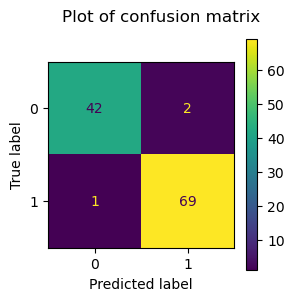

In [19]:
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
cmd.plot()
fig = cmd.figure_
fig.set_figwidth(3)
fig.set_figheight(3) 
fig.suptitle('Plot of confusion matrix')

In [20]:
# F1 scores are typically looked at when we want to compare different models which have different precision and recall scores.
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test,y_pred)

print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')

accuracy score: 0.9736842105263158
classifcation report : 
                precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.97      0.99      0.98        70

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Interpretation**

The accuracy score of 97% indicates that the model correctly predicted (benign or malignant) 97 out of 100 cases.  
Note that in very rare event detection, the model will likely predict 0 rare events or true positives (tumors) and a lot of true negatives, but the accuracy (true positives + true negatives against all confusion matrix) will be 99.9% when we have failed to predict even a single tumor. Therefore in rare event detection, accuracy as a metric, though convenient and easy to understand, may be misleading.  
The precision, recall, and F1 scores were >= 95%, indicating that the model performed well. It had just 2 false positives and 1 false negative, and 69 true positives.

**AUC/ROC curve**

To visualize the performance of the multi-class classification problem, we use the AUC (Area Under The Curve) and ROC (Receiver Operating Characteristics) curve, one of the most important evaluation metrics for checking a classification model’s performance.  
**ROC** is a probability curve or basically a separator of two overlapping probability distributions for positive and negative cases. If there is perfect/large overlap, then cases are less separable. The sum of the TP and FN rate is 1 (all true cases we either predict as true or false); therefore when the TP rate increases, the FN rate decreases. The TPR and FPR are calculated for each threshold level and plotted as a curve. A ideal test would proceed straight up the Y axis to the top and then run horizontally to the right. However, a perfect test is truly only a theoretical possibility.  
  
**AUC** is the probability of ranking a random positive case higher than a random negative case (especially in medicine, false positives are preferred over false negatives). When ROC is a diagonal line then area under line AUC =.5  indicating that the model is not better than random assignment for prediction at any threshold and therefore completely ineffective in finding positive values.  . 
  
See a sample ROC curve: 
At a more stringent than .5 threshold of .65 we detect strong true cases and TP rises faster than FP. At a more relaxed threshold, false positives start to appear. The .5 threshold (with TP=.7 and FP=.2) is closest to the upper left corner and hence it minimizes the overall classification error. Further reductions in threshold lead to a smaller rate of increase in TP, however the FP or misclassification error really starts to increase.

<img src="ROC-curve.jpg" alt="Drawing" style="width: 900px;"/>

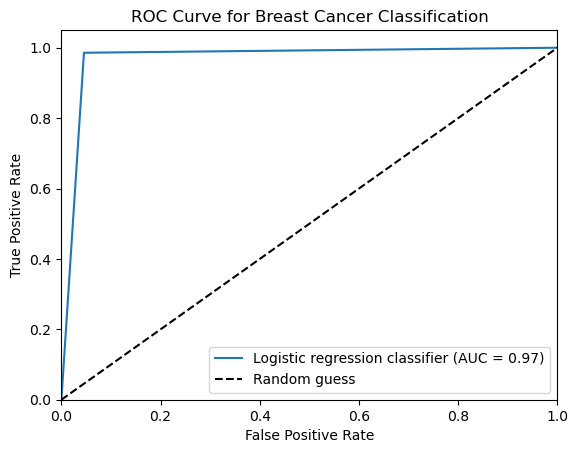

In [28]:
## ROC curve for this dataset
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
 
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic regression classifier').plot()
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

Considering the context in which this model is intended to be used, is necessary to determine a decision threshold that delivers the optimal trade-off between false positive rate (FPR) and true positive rate (TPR) for a specific use case.

**Parameter tuning**  
Sk-learn logistic regression or any classifier has parameters that can get optimized. Some common hyperparameters that can be tuned include the learning rate, regularization strength, batch size, and number of iterations.   

In order to create less complex (parsimonious) model when you have a large number of features, the Regularization techniques are used to address over-fitting and feature selection:  
L1 Regularization (Lasso Regression)  
L2 Regularization  (Ridge regression).

The key difference is that Lasso shrinks the less important features' coefficients to zero thus removing some features (which works well for feature selection in case we have a huge number of features).  
The parameter C in Logistic Regression Classifier is directly related to the regularization parameter λ but is inversely proportional to C=1/λ.

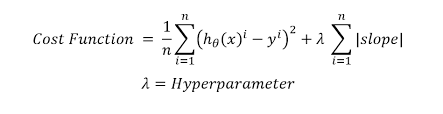

In [29]:
# What parameters do we currently have?
# When we created the model = LogisticRegression(), we did not change any default values.
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C = 1, L2 Regularization (Ridge regression).

**Create a grid of parameters to test.**  
For logistic regression, this might include parameters like C (inverse of regularization strength), penalty (type of regularization, such as L1 or L2), and others.  
The GridSearchCV is quite brutal as it tests everything with everything.

In [32]:
parameters = [{'penalty' : ['l1', 'l2'],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver' : ['newton-cg','liblinear','sag','saga'],
##              'max_iter' : [100, 1000,2500, 5000]
              }]

cls= GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=parameters,
    scoring = 'accuracy',
    cv = 3,
    verbose = 2,
    n_jobs = -1,
    return_train_score = True)

In [ ]:
# Fit the best hyperameter tuned logistic Regression model to training data
best_clf = cls.fit(X_train_scaled, y_train)

In [34]:
print('Mean Accuracy: %.3f' % cls.best_score_)
print('Config: %s' % cls.best_params_)

Mean Accuracy: 0.976
Config: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


**Make Predictions:**  
Use the trained logistic regression model to make predictions on the third dataset.

In [36]:
# We evaluate our model's ability to generalize to unseen data by scoring it against unseen validation data
model = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')

y_pred = model.fit(X_train_scaled, y_train).predict(X_val_scaled)

In [37]:
accuracy = accuracy_score(y_val, y_pred)
classification_report = classification_report(y_val,y_pred)

print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')

accuracy score: 0.9941348973607038
classifcation report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       125
           1       1.00      1.00      1.00       216

    accuracy                           0.99       341
   macro avg       0.99      0.99      0.99       341
weighted avg       0.99      0.99      0.99       341

